Training model with 32 filters...
Epoch 1/10
2813/2813 [==============================] - 14s 5ms/step - loss: 1.0801 - accuracy: 0.5944 - val_loss: 0.7819 - val_accuracy: 0.7193
Epoch 2/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.7432 - accuracy: 0.7289 - val_loss: 0.6393 - val_accuracy: 0.7650
Epoch 3/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.6413 - accuracy: 0.7658 - val_loss: 0.7605 - val_accuracy: 0.7101
Epoch 4/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.5651 - accuracy: 0.7943 - val_loss: 0.4947 - val_accuracy: 0.8226
Epoch 5/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.5121 - accuracy: 0.8116 - val_loss: 0.4731 - val_accuracy: 0.8297
Epoch 6/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.4675 - accuracy: 0.8312 - val_loss: 0.4253 - val_accuracy: 0.8457
Epoch 7/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.4369 - accuracy: 

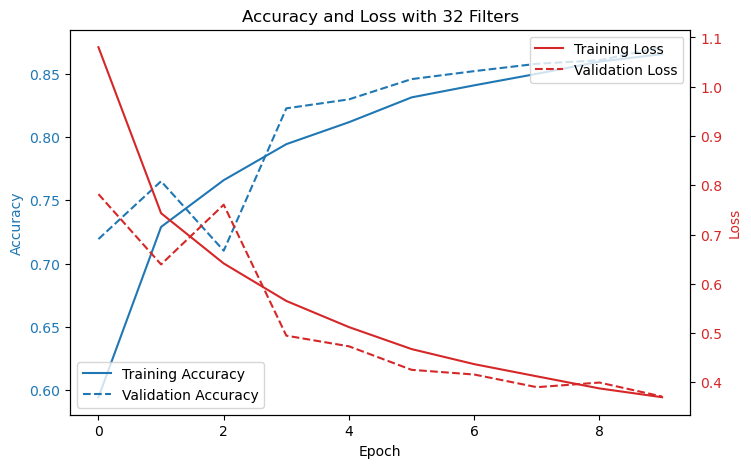

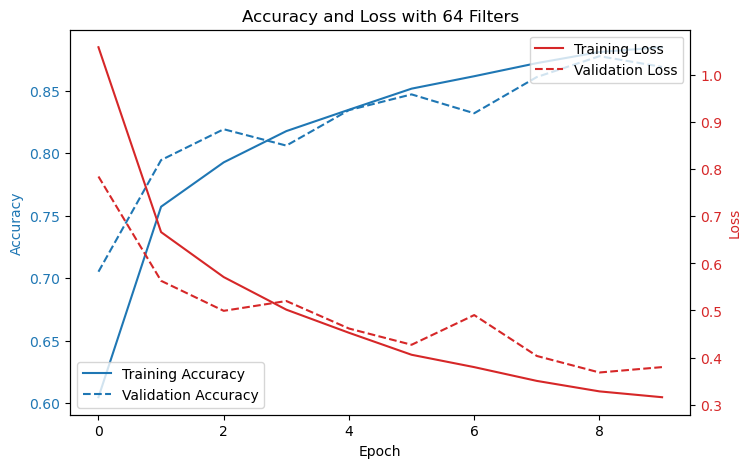

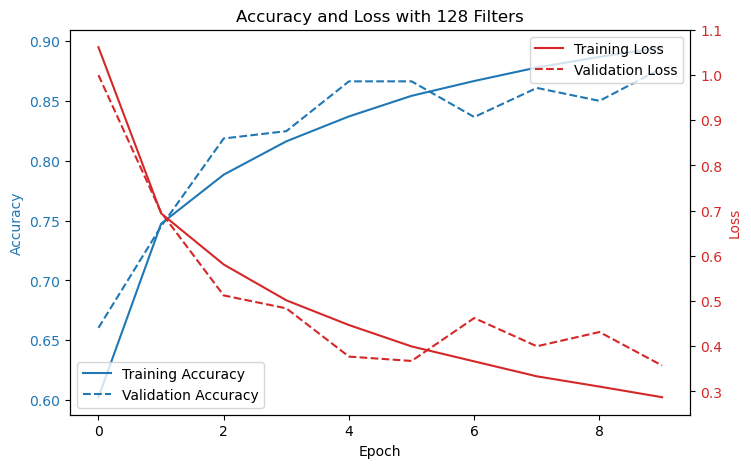

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Load the npz file (replace with your actual data path)
npz_file_path = r"C:\Users\An\pathMNIST.npz"
data = np.load(npz_file_path, allow_pickle=True)

# Extract arrays from the npz file and normalize images
train_images = data['train_images'] / 255.0
val_images = data['val_images'] / 255.0
test_images = data['test_images'] / 255.0

# One-hot encode labels
train_labels_one_hot = to_categorical(data['train_labels'], num_classes=9)
val_labels_one_hot = to_categorical(data['val_labels'], num_classes=9)
test_labels_one_hot = to_categorical(data['test_labels'], num_classes=9)

# Define the model with a variable number of filters
def build_model(num_filters):
    model = models.Sequential([
        layers.Conv2D(num_filters, (3, 3), activation='relu', input_shape=(28, 28, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(num_filters * 2, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(num_filters * 2, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(num_filters * 2, activation='relu'),
        layers.Dense(9, activation='softmax')  # Assuming 9 classes
    ])
    return model

# Hyperparameters to iterate over
num_filters_list = [32, 64, 128]
histories = {}

# Iterate over the number of filters
for num_filters in num_filters_list:
    print(f"Training model with {num_filters} filters...")
    model = build_model(num_filters)
    model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(
        train_images, train_labels_one_hot, epochs=10, 
        validation_data=(val_images, val_labels_one_hot)
    )
    histories[num_filters] = history.history

# Plotting the learning curves
for num_filters, history in histories.items():
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot accuracy on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy', color=color)
    ax1.plot(history['accuracy'], label='Training Accuracy', color=color)
    ax1.plot(history['val_accuracy'], label='Validation Accuracy', color=color, linestyle='dashed')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='lower left')

    # Instantiate a second y-axis sharing the same x-axis
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Loss', color=color)  
    ax2.plot(history['loss'], label='Training Loss', color=color)
    ax2.plot(history['val_loss'], label='Validation Loss', color=color, linestyle='dashed')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    # Title of the graph
    plt.title(f'Accuracy and Loss with {num_filters} Filters')

    # Show the plot
    plt.show()